<a href="https://colab.research.google.com/github/mtpradoc/Data_Analytics/blob/main/Twitter_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Card

#Goal:
- Build, train, test and deploy an Artificial Intelligence (AI) model to predict sentiment from thousands of tweets. Sentiment prediction involves understanding of people feelings about a product or service.

#Tools:
- Anaconda, Python, Scikit-Learn, Matplotlib, Seaborn

#Practical Real-World Application
- AI/ML sentiment analysis tools empower companies to automatically predict whether their cusotmers are happy or not. The process could be done automatically without having humans manually review thousands of tweets/reviews.

#Data:
## Inputs:
- Twitter tweets (text data)
## Output:
- Sentiment (0 or 1)

#Key Milestones
- Apply python libraries such as Pandas, Matplotlib and Seaborn to analyze and visualize text dataset.
- Perform exploratory data analysis and plot word cloud
- Perform text data cleaning such as removing punctuation and stop words
- Understand the concept of count vectorization (tokenization) and perform tokenization to tweet text data using Scikit Learn library
- Understand the theory and intuition behind Naive Bayes classifiers and learn the difference between prior probability, posterior probability, and likelihood.
- Train Naive Bayes classifier models using Scikit-Learn to perform classification and evaluate its performance using various KPIs.

See: AI-Enabled Sentiment Analysis in Business https://monkeylearn.com/blog/ai-sentiment-analysis/

# Import libraries and Datasets

In [4]:
pip install jupyterthemes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.9 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

In [7]:
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# if you don't run this code line, you will notice that the xlabel and ylabel (maybe if you have black on black) 

In [8]:
# Load the data
tweets_df = pd.read_csv('twitter.csv')

In [9]:
tweets_df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [10]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [11]:
tweets_df.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [12]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [13]:
tweets_df = tweets_df.drop(['id'], axis=1)

#Perform Data Exploration

<Axes: >

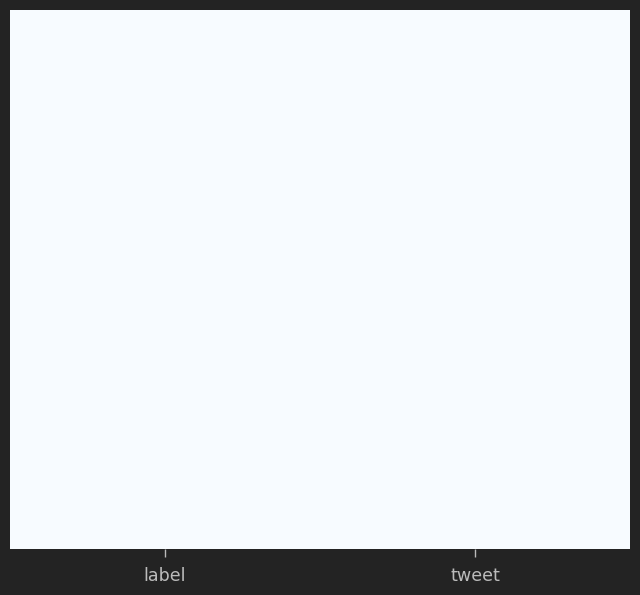

In [14]:
sns.heatmap(tweets_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

array([[<Axes: title={'center': 'label'}>]], dtype=object)

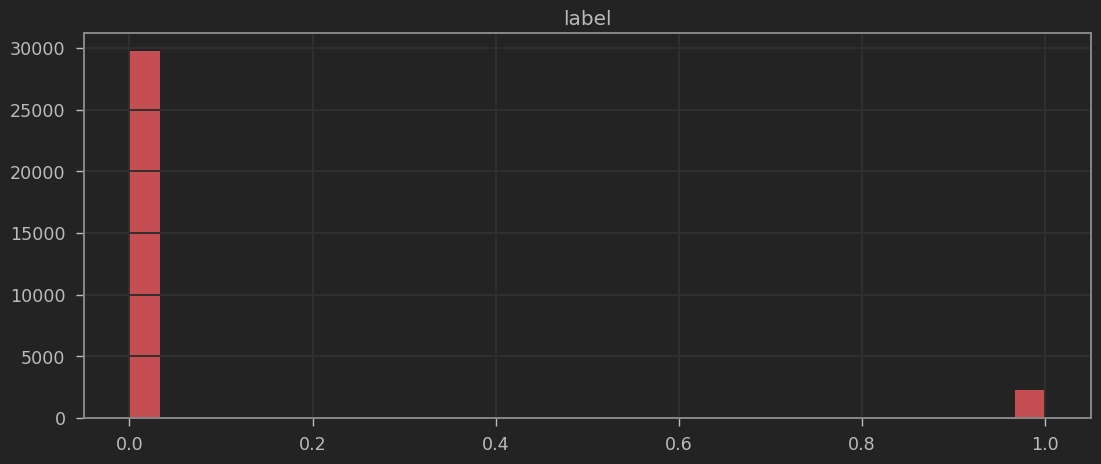

In [15]:
#Plot Histogram
tweets_df.hist(bins=30, figsize=(13,5), color = 'r')

In [16]:
tweets_df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

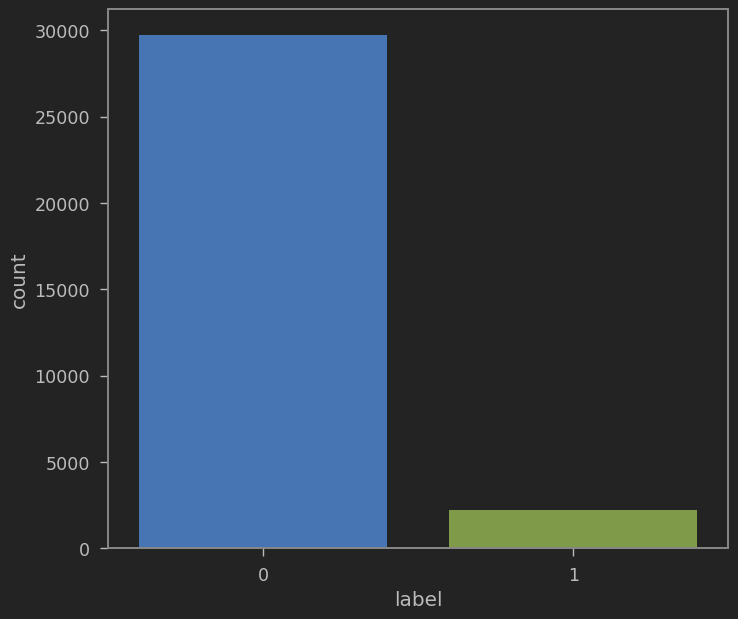

In [17]:
# Plot countplot
sns.countplot(x=tweets_df['label'], label='Count')

In [18]:
#Let's get the length of the messages
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [19]:
tweets_df

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31960      1  @user #sikh #temple vandalised in in #calgary,...      67
31961      0                   thank you @user for you follow        32

[31962 rows x 3 columns]

In [20]:
tweets_df.describe()

label        length
count  31962.000000  31962.000000
mean       0.070146     84.739628
std        0.255397     29.455749
min        0.000000     11.000000
25%        0.000000     63.000000
50%        0.000000     88.000000
75%        0.000000    108.000000
max        1.000000    274.000000

In [21]:
#Let's view the shortest message
tweets_df[tweets_df['length']==11]['tweet']

25195    i love you 
Name: tweet, dtype: object

In [22]:
#Let's view the message with mean length
tweets_df[tweets_df['length']==84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

<Axes: ylabel='Frequency'>

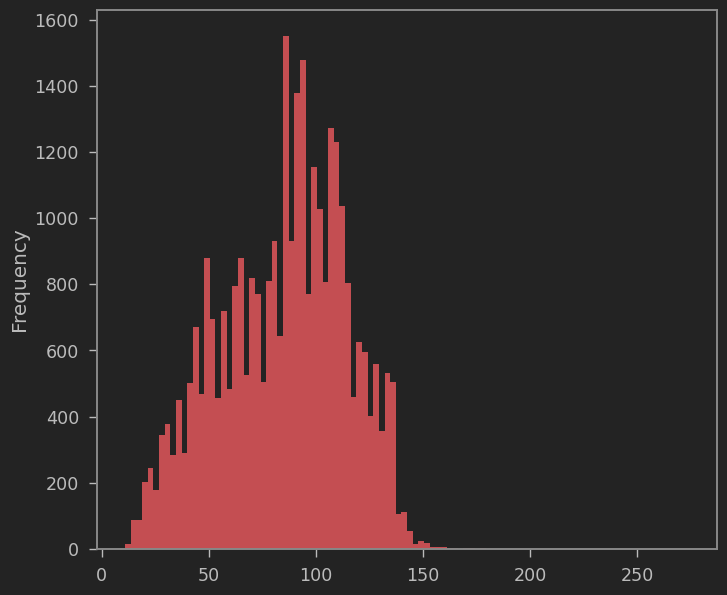

In [23]:
# Plot the histogram of the length column
tweets_df['length'].plot(bins=100, kind='hist',color='r')

#Plot the WordCloud

In [24]:
positive = tweets_df[tweets_df['label']==0]
positive

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

In [25]:
negative = tweets_df[tweets_df['label']==1]
negative

label                                              tweet  length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

In [26]:
sentences = tweets_df['tweet'].tolist()
len(sentences)

31962

In [27]:
sentences_as_one_string = " ".join(sentences)

In [28]:
sentences_as_one_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

In [29]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


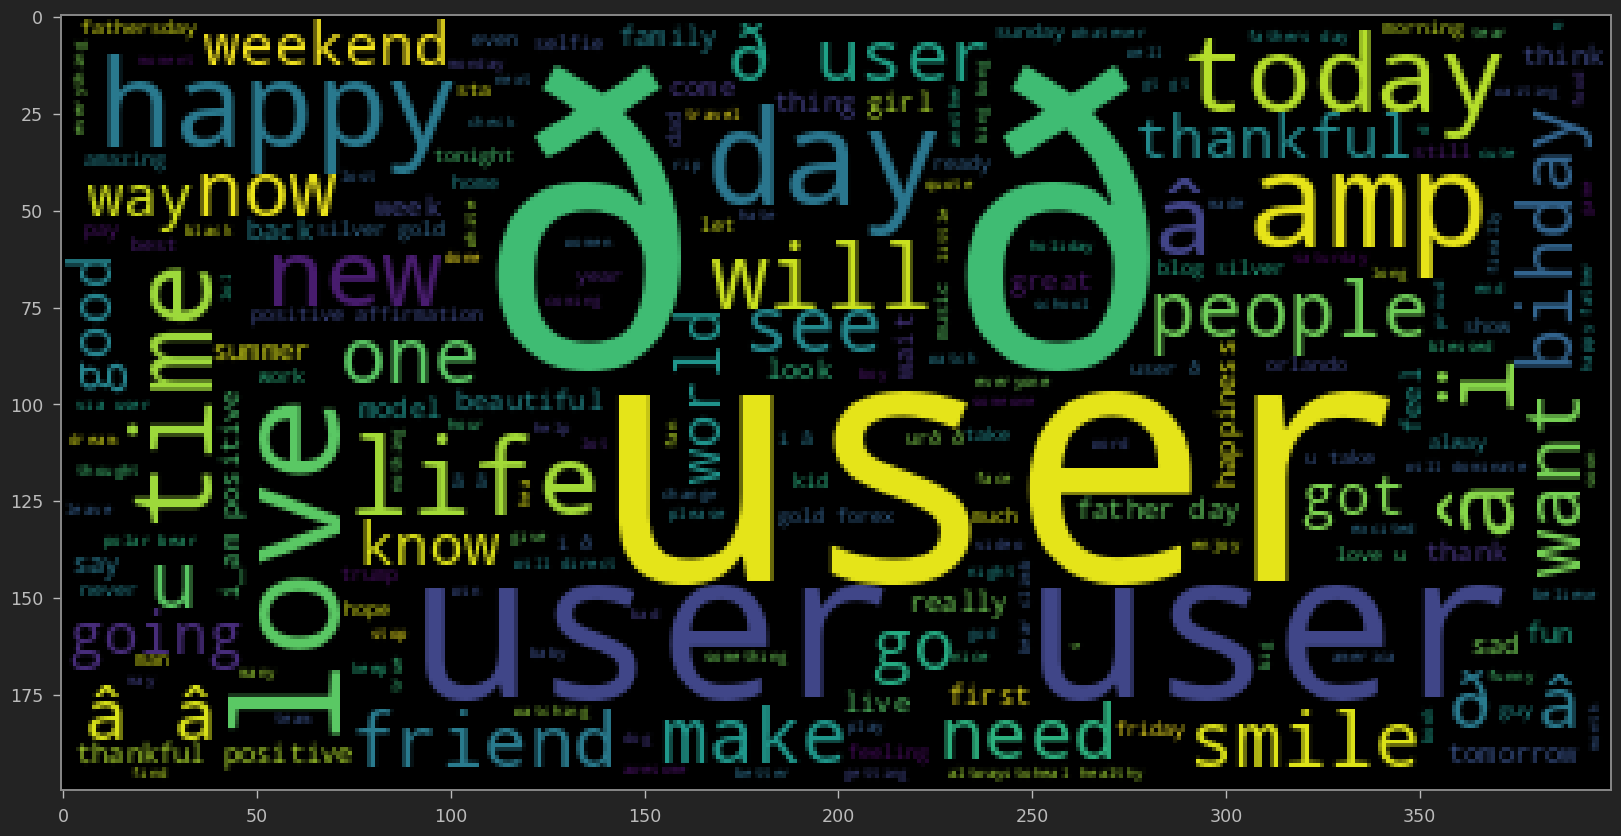

In [30]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [31]:
# Using the negative dataframe
negative_list = negative['tweet'].tolist()
negative_sentences_as_one_string = " ".join(negative_list)

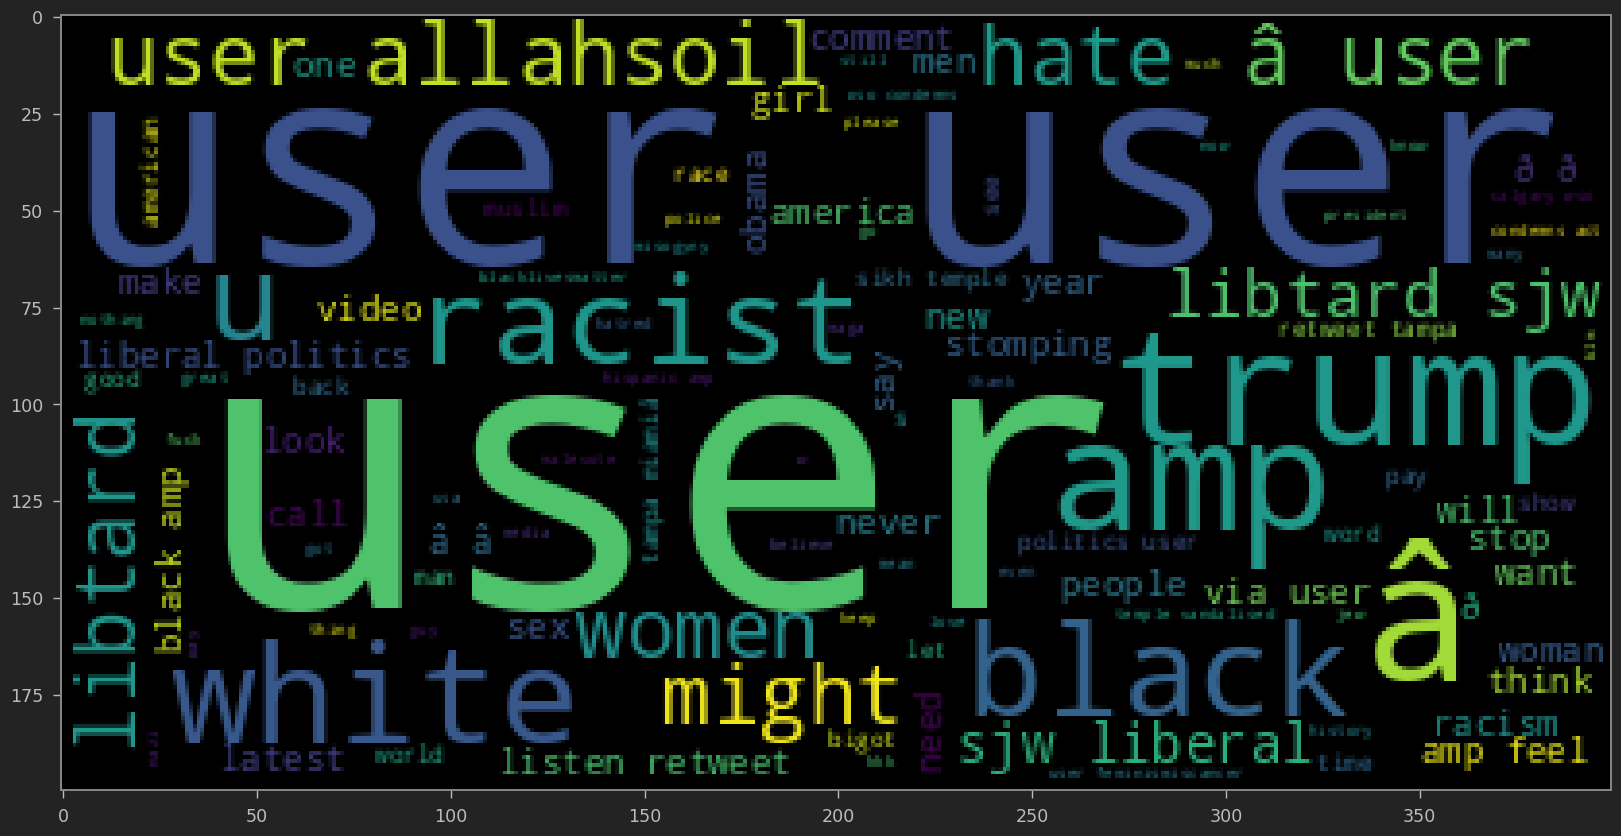

In [32]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

#Perform Data Cleaning - Remove Punctuation from Text

In [29]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
Test = '$I love & Machine learning!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love  Machine learning'

In [35]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [36]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [37]:
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

#Perform Data Cleaning - Remove Stopwords

In [31]:
import nltk #Natural language tool kit
nltk.download('stopwords')

#You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
Test_punc_removed_join = 'I enjoy coding, programming and Artificial intelligence'
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]


In [40]:
Test_punc_removed_join_clean #Only important (no so common) words are left

['enjoy', 'coding,', 'programming', 'Artificial', 'intelligence']

In [41]:
Test_punc_removed_join_clean

['enjoy', 'coding,', 'programming', 'Artificial', 'intelligence']

In [42]:
#For the following test, create a pipeline to remove punctuations followed by removing stopwords
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [43]:
mini_challenge_punc_removed = [char for char in mini_challenge if char not in string.punctuation]
mini_challenge_punc_removed_join = ''.join(mini_challenge_punc_removed)

In [44]:
mini_challenge_punc_removed_join

'Here is a mini challenge that will teach you how to remove stopwords and punctuations'

In [45]:
mini_challenge_punc_removed_join_clean = [word for word in mini_challenge_punc_removed_join.split() if word not in stopwords.words('english')]

In [46]:
mini_challenge_punc_removed_join_clean

['Here', 'mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

#Perform Count Vectorization (Tokenization)

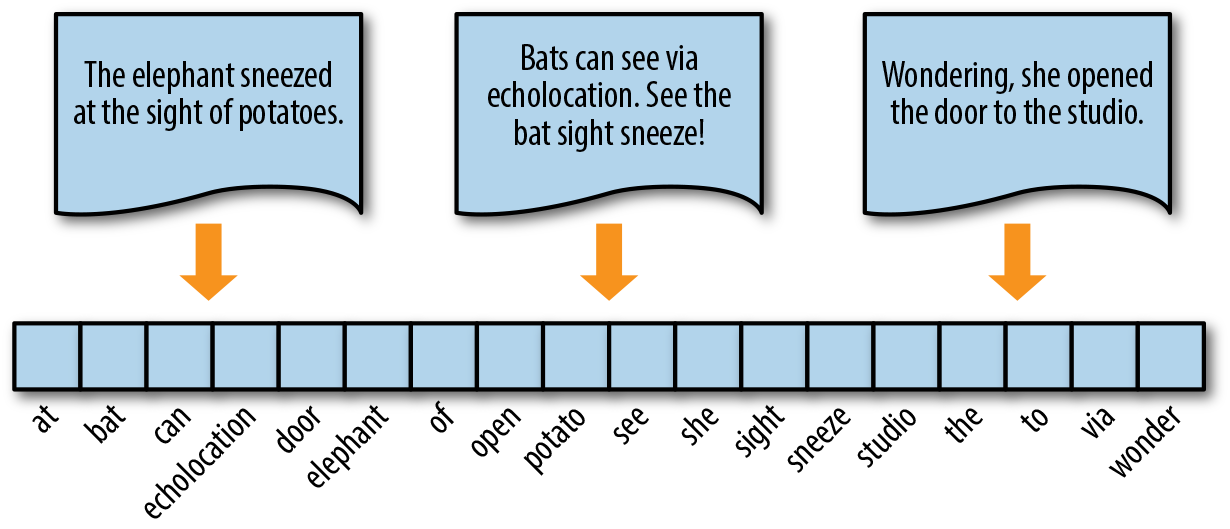

In [47]:
import urllib.request
from PIL import Image
  
urllib.request.urlretrieve(
  'https://www.oreilly.com/api/v2/epubs/9781491963036/files/assets/atap_0401.png',
   "gfg.png")
  
img = Image.open("gfg.png")
img.show()

In [48]:
from numpy.lib.function_base import vectorize
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.', 'This document is the second paper.','And this is the third one.', 'Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [49]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'paper' 'second' 'the' 'third' 'this']


In [50]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [51]:
#without doing any code, perform count vectorization for the following:
mini_challenge = ['Hello World', 'Hello Hello World','Hello World world world']
vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(vectorizer_challenge.get_feature_names_out())

['hello' 'world']


In [52]:
print(X_challenge.toarray())

[[1 1]
 [2 1]
 [1 3]]


#Create a Pipeline to Remove Punctuations, Stopwords and Perform Count Vectorization

In [53]:
#Let's define a pipeline to clean up all the messages
#The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
  Test_punc_removed = [char for char in message if char not in string.punctuation]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word not in stopwords.words('english')]
  return Test_punc_removed_join_clean

In [54]:
#Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [55]:
print(tweets_df_clean[5]) # show the cleaned up version

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [56]:
print(tweets_df['tweet'][5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [57]:
from sklearn.feature_extraction.text import CountVectorizer

#Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [58]:
print(vectorizer.get_feature_names_out())

['0' '0000001' '00027' ... 'ó¾°\x80'
 'ó¾°\x80ó¾\x8d\x92ó¾\x86\x9fó¾\x86¤ó¾®\x9fó¾\x92ºó¾®\x9eó¾\x94\x9bó¾\x94\x83ó¾\x95\x86'
 'ó¾°\x80ó¾°\x80ó¾°\x80']


In [59]:
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [60]:
tweets_countvectorizer.shape

(31962, 47386)

In [61]:
X = pd.DataFrame(tweets_countvectorizer.toarray())

In [62]:
X

0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957      0      0      0      0      0      0      0      0      0      0   
31958      0      0      0      0      0      0      0      0      0      0   
31959      0      0      0      0      0      0      0      0      0      0   
31960      0      0      0      0      0      0      0      0      0      0   
31961      0      0      0      0      0      0      0      0      0      0   

       ...  47376  47377  47378  47379  47380  47381  47382  47383  47384  \
0      ...      0      0      0      0      0      0      0      0      0   
1      ...      0      0      0      0      0      0      0      0      0   
2      ...      0      0      0      0      0      0      0      0      0   
3      ...      0      0      0      0      0      0      0      0      0   
4      ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957  ...      0      0      0      0      0      0      0      0      0   
31958  ...      0      0      0      0      0      0      0      0      0   
31959  ...      0      0      0      0      0      0      0      0      0   
31960  ...      0      0      0      0      0      0      0      0      0   
31961  ...      0      0      0      0      0      0      0      0      0   

       47385  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
31957      0  
31958      0  
31959      0  
31960      0  
31961      0  

[31962 rows x 47386 columns]

In [63]:
y = tweets_df['label']

#Understand the Theory and Intuition behind Naive Bayes

###Naïve Bayes: Intuition





*   Naïve Bayes is a classification technique based on Bayes' Theorem.
*   Let's assume that you are data scientist working major bank in NYC and you want to classify a new client as eligible to retire or not.
*   Customer features are his/her age and salary.







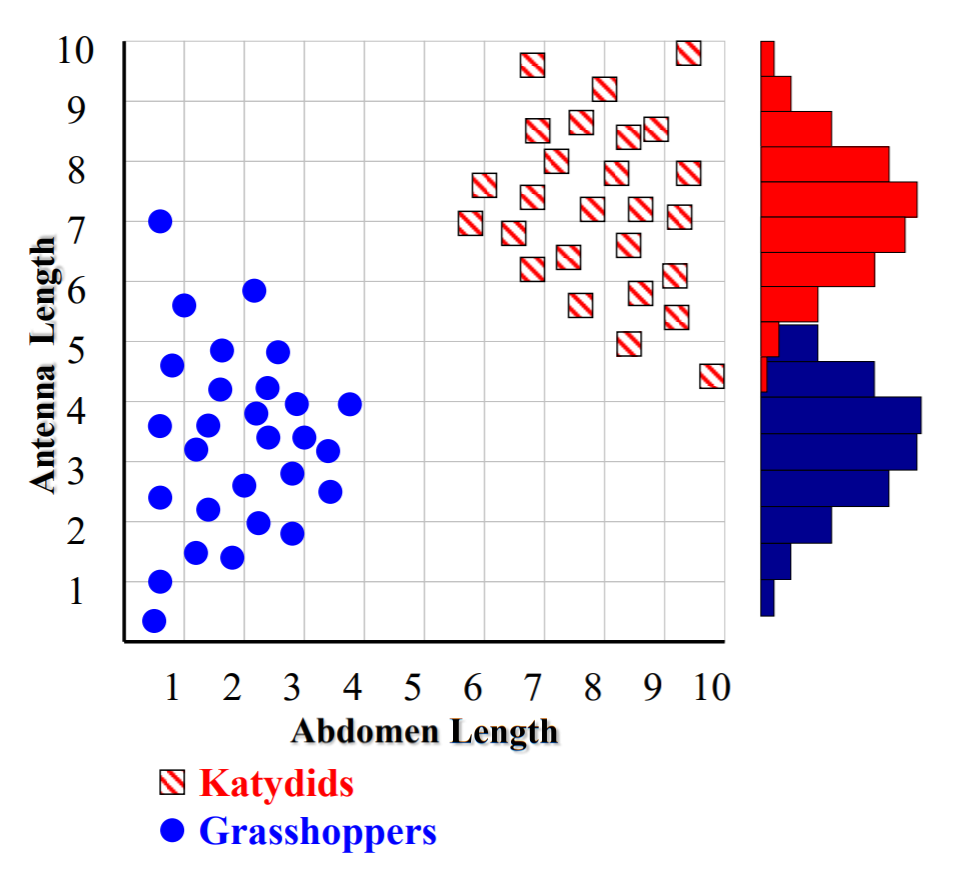

In [64]:
urllib.request.urlretrieve(
  'https://devopedia.org/images/article/395/1454.1648698209.png',
   "gfg.png")
  
img = Image.open("gfg.png")
img.show()

**Prior probability of RED** = (Number of RED Points) / (Total Number of Points) = 20 / 60

**Prior probability of BLUE** = (Number of BLUE Points) / (Total Number of Points) = 40 / 60

##Naïve Bayes: 2. Likelihood



*   For the new point, if there are more BLUE points in its vicinity, it is more likely that the new point will be classified as BLUE.
*   So we draw a circle around the point, then we claculate the number of points in the circle belonging to each class label.



**Likelihood of X being RED** = (Number of RED Points in vicinity) / (Total Number of RED Points) = 3/ 20

**Likelihood of X being BLUE** = (Number of BLUE Points in vicinity) / (Total Number of BLUE Points) = 3/ 20

##Naïve Bayes: 3. Posterior Probability


*   Let's combine prior probability and likelihood to create a posterior probability.
*   Prior probabilities: suggests that X may be classified as BLUE Because there are 2x as much blue points.
*   Likelihood: suggests that X is RED because there are more RED points in the vicinity of X.
*   Bayes' Rule combines both to form a posterior probability.





**Posterior Probability of X being RED** = Prior Probability of RED * Likelihood of X being RED = (20/ 60) * (3/20) = 1/20

**Posterior Probability of X being BLUE** = Prior Probability of BLUE * Likelihood of X being BLUE = (40/ 60) * (1/40) = 1/60

##Naïve Bayes: MATH

**P(Retire | X)** = ( P(X | Retire) * P(Retire) ) / P(X)

- **Naïve Bayes is a classification technique based on Baye's Theorem.**

- X : New Customer's features; age and savings

- P(Retire|X) : probability of customer retiring given his/her features, such as age and savings

- P(Retire) : Prior Probability of Retiring, without any prior knowledge

- P(X | Retire) : Likelihood

- P(X) : Marginal Likelihood, the probability of any point added lies into the circle

##Naïve Bayes: 2. Math

**P(Retire | X)** = ( P(X | Retire) * P(Retire) ) / P(X)

- P(Retire) = # of Retiring / Total points = 40 / 60

- P(X|Retire) = # of similar observations for retiring / Total # retiring = 1 / 40

- P(X) = # of Similar observations / Total # Points = 4 / 60

- P(Retire|X) = (40/60*1/40) / (4/60) = (1/60) / (4/60) = 0.25

##Practice

**P(No Retire | X)** = ( P(X |No Retire) * P(No Retire) ) / P(X)

- P(No Retire) = # of No Retiring / Total points = 20 / 60

- P(X|No Retire) = # of similar observations for No retiring / Total # retiring = 3 / 20

- P(X) = # of Similar observations / Total # Points = 4 / 60

- P(No Retire|X) = (20/60*3/20) / (4/60) = (3/60) / (4/60) = 0.75

##Train and Evaluate a Naïve Bayes Classifier Model

In [65]:
X.shape

(31962, 47386)

In [66]:
y.shape

(31962,)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [78]:
from sklearn.naive_bayes import  MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [69]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

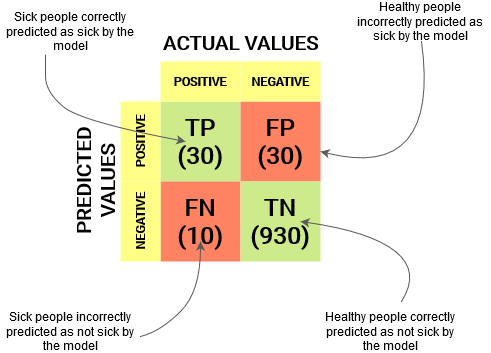

In [71]:
urllib.request.urlretrieve(
  'https://av-eks-blogoptimized.s3.amazonaws.com/Example-Confusion-matrix.png',
   "gfg.png")
  
img = Image.open("gfg.png")
img.show()

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

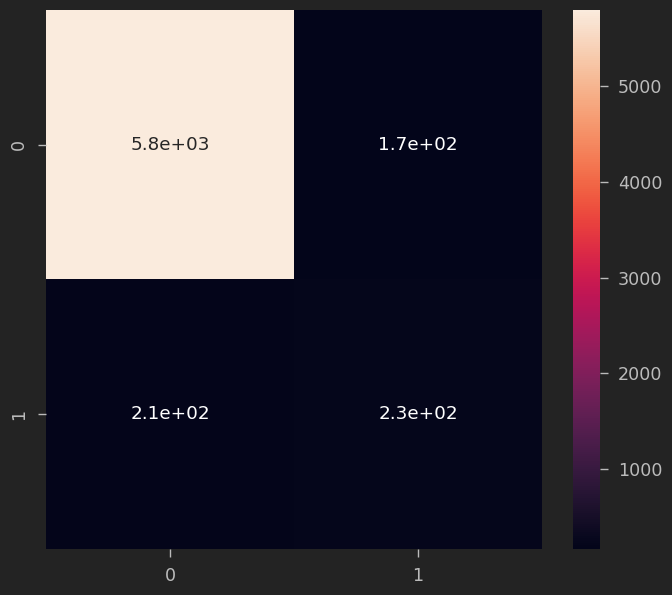

In [80]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [81]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5960
           1       0.58      0.52      0.55       433

    accuracy                           0.94      6393
   macro avg       0.77      0.75      0.76      6393
weighted avg       0.94      0.94      0.94      6393



#Final Project

**Goal**:
- Build, train, test and deploy an Artificial intelligence (AI) model to predict sentiment from real Amazon Echo customer reviews.

**Tool**:
- Python, Scikit-learn, Matplotlib, Seaborn

**Practical Real-World Application**:
- AI/ML-based sentiment analysis is crucial for companies to automatically predict whether their customers are happy or not. The process could be done automatically without having humans manually review thousands of customer reviews.

**Data**:
- **Inputs**:
-- Amazon Revies
- **Output**:
-- Sentiment (0 or 1)

1. Instead of using Twitter dataset, use the "Amazon reviews" dataset provided in the course package.
2. Perform Exploratory data analysis.
3. Plot the wordcloud and list the top 3 popular words.
4. Train multiple models using Scikit Learn.
5. Assess trained models performance.

In [6]:
# Load the data
reviews_df = pd.read_csv('amazon_reviews.csv')
reviews_df

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                 ...       ...  
3145  Perfect for kids, adults and everyone in betwe...         1  
3146  Listening to music, searching locations, check...         1  
3147  I do love these things, i have them running my...         1  
3148  Only complaint I have is that the sound qualit...         1  
3149                                               Good         1  

[3150 rows x 5 columns]

In [7]:
# View the dataframe information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


<Axes: xlabel='rating', ylabel='count'>

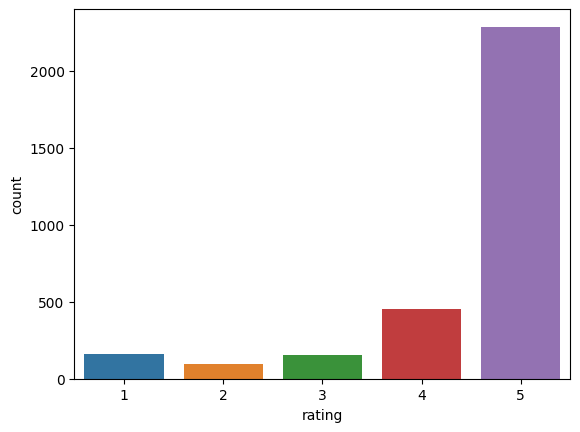

In [8]:
# Plot the count plot for the ratings
sns.countplot(x = reviews_df['rating'])

In [9]:
# Let's get the length of the verified_reviews column
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

In [10]:
reviews_df

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  length  
0                                         Love my Echo!         1      13  
1                                             Loved it!         1       9  
2     Sometimes while playing a game, you can answer...         1     195  
3     I have had a lot of fun with this thing. My 4 ...         1     172  
4                                                 Music         1       5  
...                                                 ...       ...     ...  
3145  Perfect for kids, adults and everyone in betwe...         1      50  
3146  Listening to music, searching locations, check...         1     135  
3147  I do love these things, i have them running my...         1     441  
3148  Only complaint I have is that the sound qualit...         1     380  
3149                                               Good         1       4  

[3150 rows x 6 columns]

<Axes: ylabel='Frequency'>

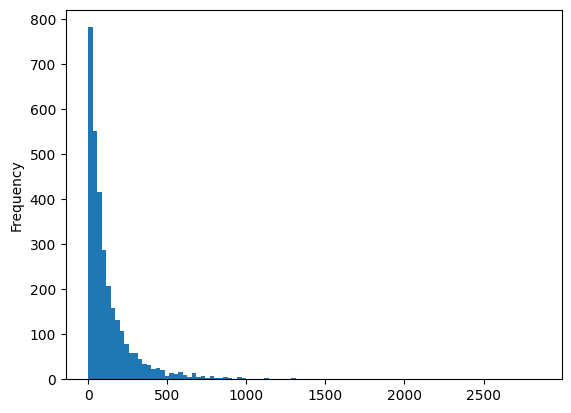

In [11]:
# Plot the histogram for the length
reviews_df['length'].plot(bins=100, kind='hist')

In [12]:
# Apply the describe method to get statistical summary
reviews_df.describe()

rating     feedback       length
count  3150.000000  3150.000000  3150.000000
mean      4.463175     0.918413   132.049524
std       1.068506     0.273778   182.099952
min       1.000000     0.000000     1.000000
25%       4.000000     1.000000    30.000000
50%       5.000000     1.000000    74.000000
75%       5.000000     1.000000   165.000000
max       5.000000     1.000000  2851.000000

<Axes: xlabel='feedback', ylabel='count'>

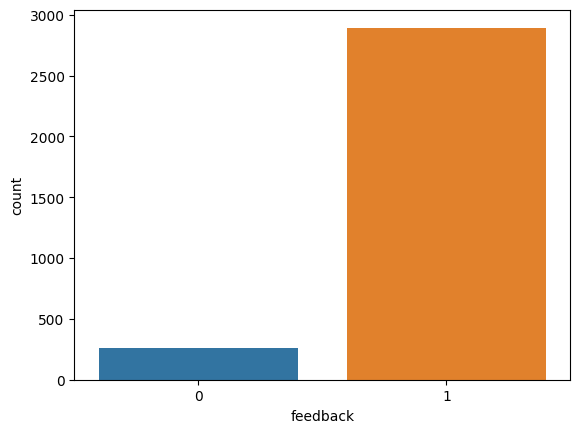

In [13]:
# Plot the countplot for feedback
# Positive ~2800
# Negative ~250
sns.countplot(x = reviews_df['feedback'])

##Plot WordCloud

In [14]:
#Obtain only the positive reviews
positive = reviews_df[reviews_df['feedback'] == 1]
positive

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  length  
0                                         Love my Echo!         1      13  
1                                             Loved it!         1       9  
2     Sometimes while playing a game, you can answer...         1     195  
3     I have had a lot of fun with this thing. My 4 ...         1     172  
4                                                 Music         1       5  
...                                                 ...       ...     ...  
3145  Perfect for kids, adults and everyone in betwe...         1      50  
3146  Listening to music, searching locations, check...         1     135  
3147  I do love these things, i have them running my...         1     441  
3148  Only complaint I have is that the sound qualit...         1     380  
3149                                               Good         1       4  

[2893 rows x 6 columns]

In [23]:
# Obtain the negative reviews only
negative = reviews_df[reviews_df['feedback'] == 0]
negative

rating       date             variation  \
46         2  30-Jul-18      Charcoal Fabric    
111        2  30-Jul-18      Charcoal Fabric    
141        1  30-Jul-18      Charcoal Fabric    
162        1  30-Jul-18     Sandstone Fabric    
176        2  30-Jul-18  Heather Gray Fabric    
...      ...        ...                   ...   
3047       1  30-Jul-18            Black  Dot   
3048       1  30-Jul-18            White  Dot   
3067       2  30-Jul-18            Black  Dot   
3091       1  30-Jul-18            Black  Dot   
3096       1  30-Jul-18            White  Dot   

                                       verified_reviews  feedback  length  
46    It's like Siri, in fact, Siri answers more acc...         0     163  
111   Sound is terrible if u want good music too get...         0      53  
141                                  Not much features.         0      18  
162   Stopped working after 2 weeks ,didn't follow c...         0      87  
176                                Sad joke. Worthless.         0      20  
...                                                 ...       ...     ...  
3047  Echo Dot responds to us when we aren't even ta...         0     120  
3048              NOT CONNECTED TO MY PHONE PLAYLIST :(         0      37  
3067  The only negative we have on this product is t...         0     240  
3091                                  I didn’t order it         0      17  
3096  The product sounded the same as the emoji spea...         0     210  

[257 rows x 6 columns]

In [16]:
# Convert to list format
sentences = positive['verified_reviews'].tolist()
len(sentences)

2893

In [17]:
# Join all reviews into one large string
sentences_as_one_string = " ".join(sentences)

In [18]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [19]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


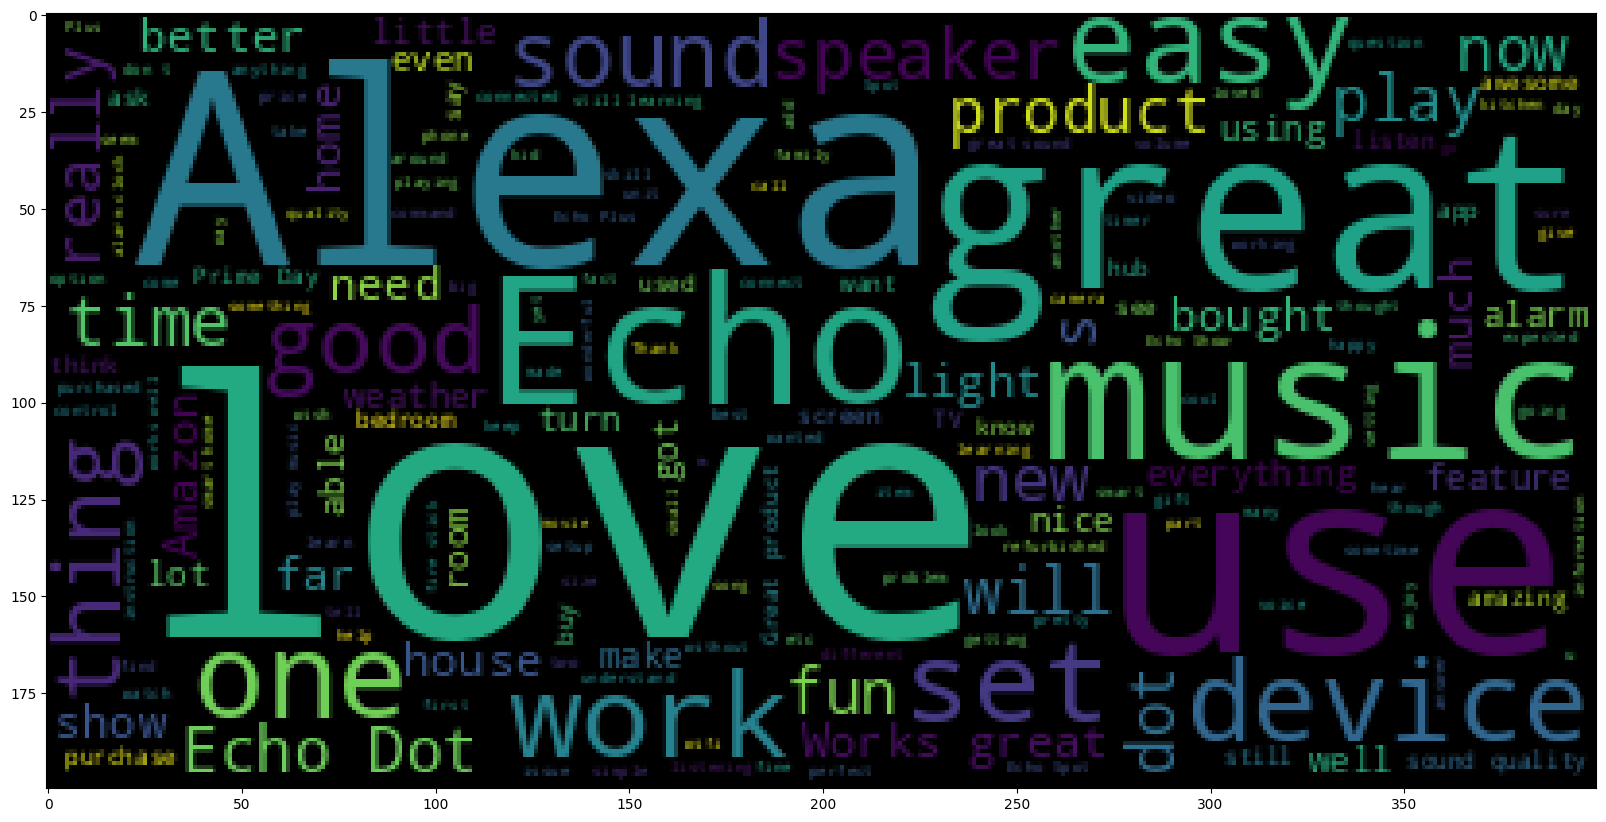

In [21]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

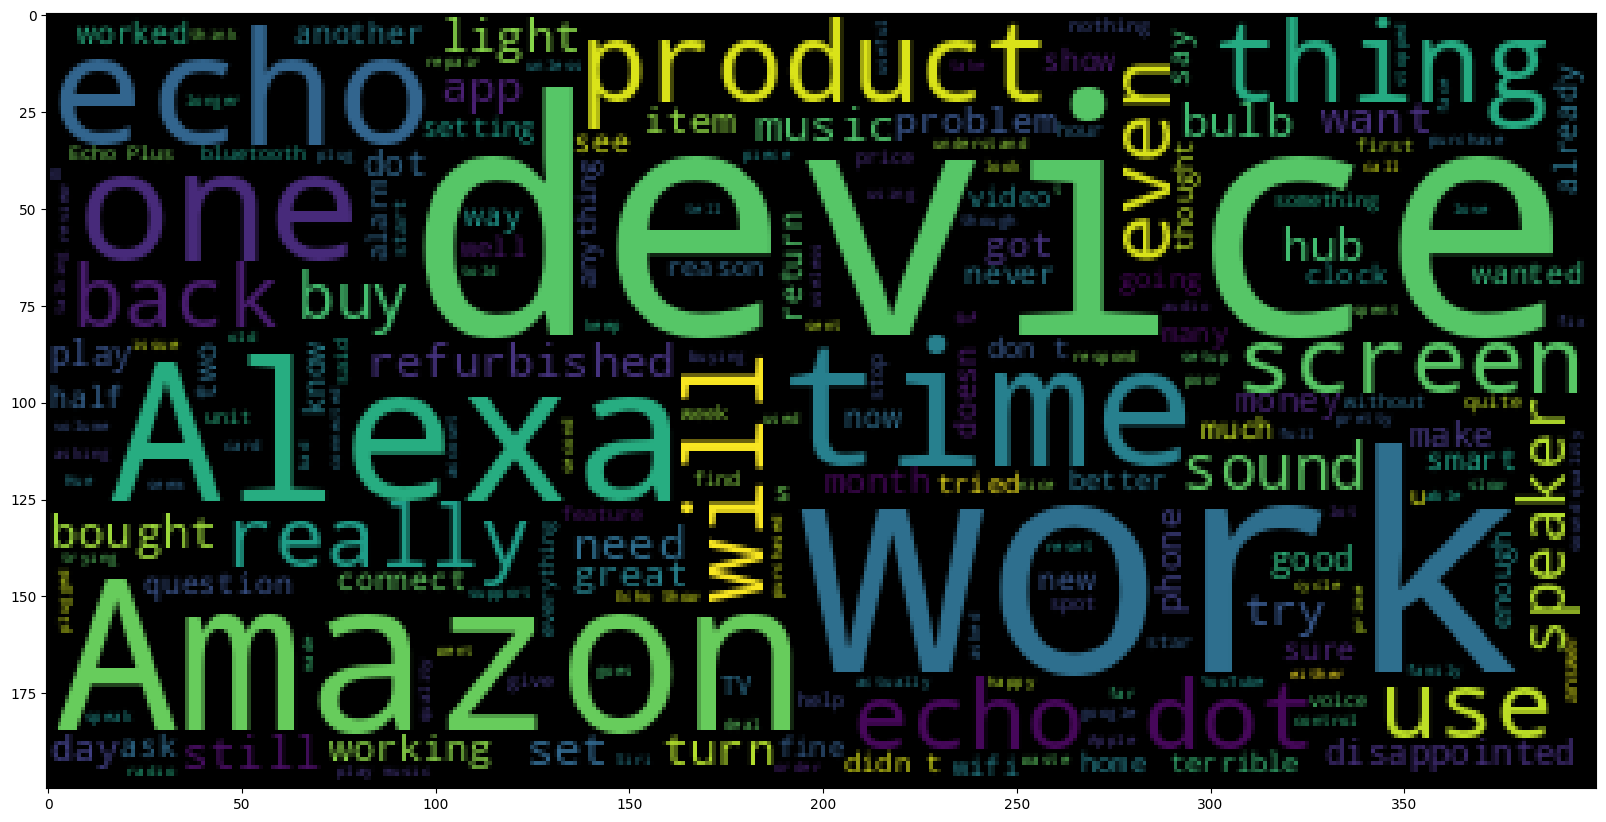

In [25]:
sentences = negative['verified_reviews'].tolist()
len(sentences)
sentences_as_one_string = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

##Perform Data Cleaning

In [27]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
  Test_punc_removed = [char for char in message if char not in string.punctuation]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  return Test_punc_removed_join_clean

In [32]:
# Let's test the newly added function
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [33]:
# show the original review
print(reviews_df['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [34]:
# show the cleaned up version
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [35]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [36]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [37]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
reviews_countvectorizer.shape

(3150, 5211)

In [40]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [41]:
X = reviews

In [42]:
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

##Train and Test AI/ML Models

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

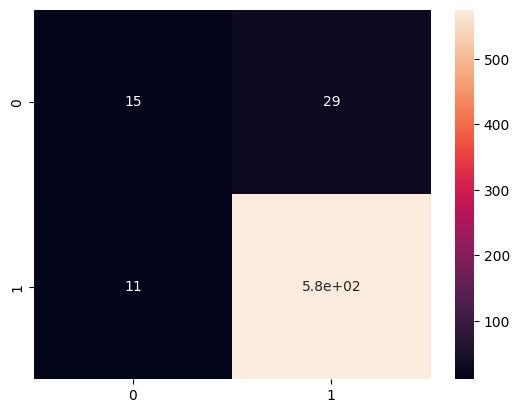

In [46]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [47]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.58      0.34      0.43        44
           1       0.95      0.98      0.97       586

    accuracy                           0.94       630
   macro avg       0.76      0.66      0.70       630
weighted avg       0.93      0.94      0.93       630



              precision    recall  f1-score   support

           0       0.59      0.23      0.33        44
           1       0.94      0.99      0.97       586

    accuracy                           0.93       630
   macro avg       0.77      0.61      0.65       630
weighted avg       0.92      0.93      0.92       630



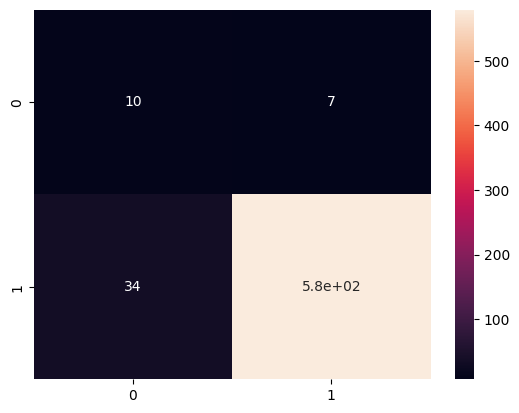

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.09      0.15        44
           1       0.94      0.99      0.96       586

    accuracy                           0.93       630
   macro avg       0.69      0.54      0.56       630
weighted avg       0.90      0.93      0.91       630



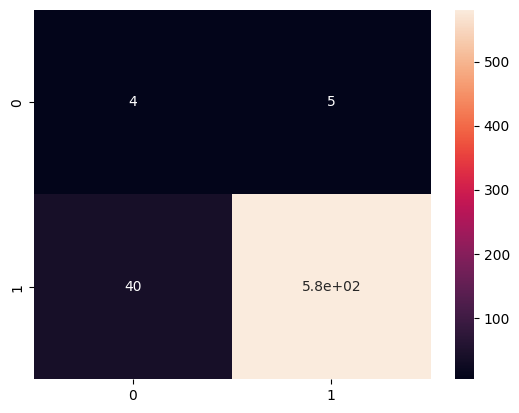

In [49]:
from traitlets import config
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))